In [2]:
#read all the data from the enron dataset
from email.parser import Parser
rootdir="C:/Users/Raksha/Desktop/Midterm/Data/enron_mail_20150507/maildir/skilling-j/deleted_items/4_"
with open(rootdir, 'r',encoding='utf-8',errors='ignore') as f:
    data=f.read()
    #print(data)

In [3]:
email=Parser().parsestr(data)
print(type(email))
print("\nTo:",email['to'])
print("\nFrom:",email['from'])
print("\nSubject:",email['subject'])
print("\n \n Body:",email.get_payload())

<class 'email.message.Message'>

To: chris.abel@enron.com, john.allison@enron.com, beth.apollo@enron.com, 
	sally.beck@enron.com, rick.buy@enron.com, c..gossett@enron.com, 
	bjorn.hagelmann@enron.com, m.hall@enron.com, todd.hall@enron.com, 
	frank.hayden@enron.com, kimberly.hillis@enron.com, 
	william.kelly@enron.com, louise.kitchen@enron.com, 
	hal.mckinney@enron.com, ted.murphy@enron.com, l..nowlan@enron.com, 
	david.port@enron.com, tammie.schoppe@enron.com, 
	cassandra.schultz@enron.com, john.swinney@enron.com, 
	m..taylor@enron.com, kenneth.thibodeaux@enron.com, 
	cassi.wallace@enron.com

From: kenneth.thibodeaux@enron.com

Subject: ERV Notification:  (Violation/Notification Memo - 08/29/2001)

 
 Body: The report named: Violation/Notification Memo <http://erv.corp.enron.com/linkFromExcel.asp?report_cd=60&report_name=Violation/Notification+Memo&category_cd=2&category_name=ENRON%20CONSOLIDATED&toc_hide=1&sTV1=2&TV1Exp=Y&current_efct_date=08/29/2001>, published as of 08/29/2001 is no

In [4]:
import pandas as pd
import matplotlib.pyplot as py
import os,re,json


In [5]:
#To loop through all the files in the folder and add data to the respective lists
indir = "/Users/Raksha/Desktop/Midterm/Data/enron_mail_20150507/maildir/skilling-j/_sent_mail/"
subject=[]
body=[]
tomails=[]
dateofmails=[]
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        log = open(os.path.join(root, f), 'r')
        d=log.read()
        mail=Parser().parsestr(d)
        tomails.append(mail['to'])
        subject.append(mail['subject'])
        body.append(mail.get_payload())
        dateofmails.append(mail['date'])
dateofmails

['Wed, 5 Apr 2000 04:20:00 -0700 (PDT)',
 'Wed, 5 Apr 2000 04:15:00 -0700 (PDT)',
 'Wed, 5 Apr 2000 03:32:00 -0700 (PDT)',
 'Tue, 4 Apr 2000 02:07:00 -0700 (PDT)',
 'Thu, 30 Mar 2000 10:14:00 -0800 (PST)',
 'Wed, 29 Mar 2000 08:14:00 -0800 (PST)',
 'Wed, 29 Mar 2000 07:13:00 -0800 (PST)',
 'Wed, 29 Mar 2000 03:47:00 -0800 (PST)',
 'Wed, 29 Mar 2000 03:37:00 -0800 (PST)',
 'Tue, 28 Mar 2000 23:55:00 -0800 (PST)',
 'Wed, 6 Dec 2000 07:49:00 -0800 (PST)',
 'Tue, 28 Mar 2000 23:47:00 -0800 (PST)',
 'Tue, 28 Mar 2000 23:46:00 -0800 (PST)',
 'Tue, 28 Mar 2000 23:45:00 -0800 (PST)',
 'Tue, 28 Mar 2000 23:41:00 -0800 (PST)',
 'Tue, 7 Mar 2000 03:20:00 -0800 (PST)',
 'Thu, 24 Feb 2000 09:00:00 -0800 (PST)',
 'Thu, 24 Feb 2000 03:14:00 -0800 (PST)',
 'Fri, 18 Feb 2000 06:17:00 -0800 (PST)',
 'Fri, 11 Feb 2000 06:32:00 -0800 (PST)',
 'Tue, 8 Feb 2000 00:58:00 -0800 (PST)',
 'Wed, 6 Dec 2000 06:51:00 -0800 (PST)',
 'Tue, 8 Feb 2000 00:16:00 -0800 (PST)',
 'Mon, 7 Feb 2000 07:38:00 -0800 (PST)',
 '

## Analysis 1: Find all the mails that were probably sent to an off the hook corporation

In [6]:
for tomail in tomails:
    if(not(tomail.endswith('enron.com'))):
        print("The mail sent to", tomail, "was probably to an off the hook corporation")

The mail sent to trish3kids@aol.com was probably to an off the hook corporation
The mail sent to markskilling@hotmail.com was probably to an off the hook corporation
The mail sent to mike_buttrey@mhbt.com was probably to an off the hook corporation
The mail sent to ds@cogentco.com was probably to an off the hook corporation
The mail sent to ysaettone@home-link.com was probably to an off the hook corporation
The mail sent to collins@risk.co.uk was probably to an off the hook corporation
The mail sent to smurphy@unterberg.com was probably to an off the hook corporation
The mail sent to rex_shelby@enron.net was probably to an off the hook corporation
The mail sent to nancy_siska@cargill.com was probably to an off the hook corporation
The mail sent to afouke@tnc.org was probably to an off the hook corporation
The mail sent to lstuart@erehab.com was probably to an off the hook corporation
The mail sent to nkelley@tqcap.com was probably to an off the hook corporation
The mail sent to david.k

## Analysis 2: Year in which maximum number of emails were sent

In [7]:
#convert the elements in the list dateofmails to datetime format
from datetime import datetime
import email.utils
yearsofemails=[]
maildate=[]
for dateofmail in dateofmails: 
    datetime_object,timezone=dateofmail.rsplit(' ',1)
    yearsofemails.append(datetime.strptime(datetime_object, '%a, %d %b %Y %H:%M:%S %z').date().strftime('%Y'))
yearsofemails   

['2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2001',
 '2000',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2000',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2000',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2000',
 '2000',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2000',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2000',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 

In [13]:
#Add all the data in the list to a dataframe
import pandas as pd
#labels = ['Year']
df = pd.DataFrame(yearsofemails)
#pd.concat(df)
df.columns = ['Year']
df1 = df.apply(pd.to_numeric, errors='coerce')
df1.head()

,Year
0,2000
1,2000
2,2000
3,2000
4,2000


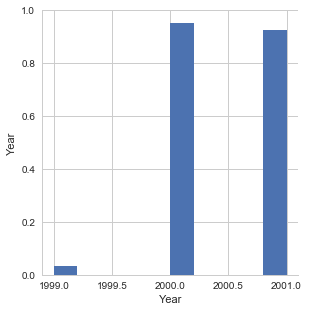

In [10]:
#pairplot of the dataframe to find the time maximum emails were sent
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style='whitegrid', context = 'notebook')
cols = ['Year']
sb.pairplot(df1[cols], size = 4.5)
plt.show()

## Analysis 3: LDA model to generate topics based on word frequency

In [11]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = stopwords.words('english')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
doc_set = body

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)
print(ldamodel)

LdaModel(num_terms=5174, num_topics=2, decay=0.5, chunksize=2000)


In [12]:
print(ldamodel.print_topics(num_topics=2, num_words=4))

[(0, '0.055*"enron" + 0.023*"ect" + 0.014*"jeff" + 0.013*"com"'), (1, '0.019*"jeff" + 0.019*"com" + 0.015*"enron" + 0.014*"skill"')]
